In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
data = pd.DataFrame(boston.data)

In [ ]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [35]:
data['PRICE'] = boston.target

In [ ]:
data.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [36]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


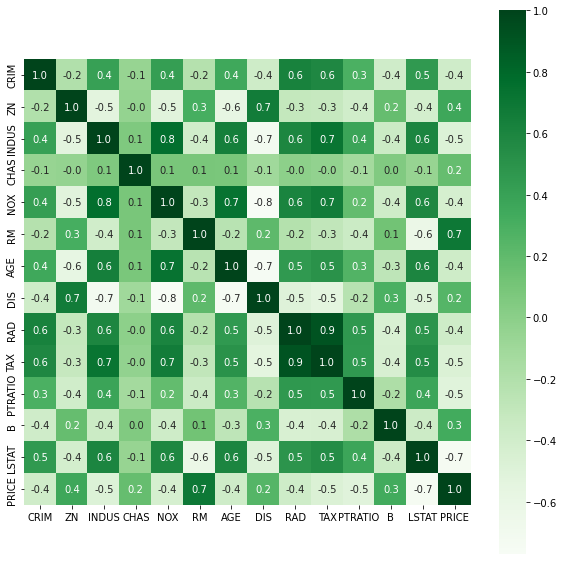

In [ ]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [37]:
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [ ]:
import tensorflow as tf

In [ ]:
observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-10,10,(observations,1))
generated_target=2*xs-3*zs+5+noise

In [ ]:
np.savez('TF_intro',input=generated_inputs,targets=generated_target)
training_data=np.load('TF_intro.npz')

In [ ]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 54.1562
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 37.2445
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 36.5356
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 34.3725
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 36.4157
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 36.9010
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 35.5083
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 36.2927
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 37.1292
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 36.8299
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 34.8339
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 34.7317
Epoch 13/100
32/32 [=====

In [ ]:
models.layers[0].get_weights()


[array([[ 2.496019 ],
        [-2.5502539]], dtype=float32), array([5.044394], dtype=float32)]

In [ ]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]

In [ ]:
out=training_data['targets'].round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

0.02827574306481548

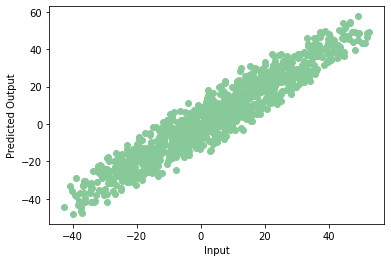

In [ ]:
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),np.squeeze(training_data['targets']),c='#88c999')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()